# Notebook A
## Exploração de Dados 2018/2019 
### Nelson Costa 42983
### Armando Sousa 76498

## Index
- [Task A - Pre Processing](#Task-A---Pre-Processing)
 - [Checking missing values](#Checking-if-datasets-have-missing-values)
 - [Handling categorical data](#Handling-categorical-data)
 - [Encoding class labels](#Encoding-class-labels)
 - [Partitioning datasets](#Partitioning-datasets-in-training-and-test-sets)
 - [Rank features](#Rank-features)
   - [Univariate Feature Selection](#1.-Univariate-Feature-Selection)
     - [1. Mutual Info Classif](#1.-Mutual-Info-Classif)
     - [2. Chi-squared](#2.-Chi-squared)
 - [Dimension reduction](#Dimension-reduction)
   - [Principal Component Analysis - Banknotes](#PCA---Banknotes-dataset)
   - [Kernel PCA - Banknotes](#KPCA---Banknotes-dataset)
   - [Principal Component Analysis - Nursery](#PCA---Nursery-dataset)
   - [Kernel PCA - Nursery](#KPCA---Nursery-dataset)
- [Task B - Predictive Model](#Task-B---Predictive-Model)
 - [Multilayer Perceptron - Banknotes dataset](#MLP---Banknotes-dataset)
 - [Support Vector Machine - Banknotes dataset](#SVM---Banknotes-dataset)
 - [Multilayer Perceptron - Nursery dataset](#MLP---Nursery-dataset)
 - [Support Vector Machine - Nursery dataset](#SVM---Nursery-dataset)
 


In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reading datasets

### Banknotes dataset

In [3]:
df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')
#df_bankNotes

### Nursery dataset

In [4]:
df_nursery = pd.read_excel('./nursery.xlsx')
#df_nursery

# Task A - Pre Processing

## Checking if datasets have missing values

### Banknotes dataset

In [5]:
df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

### Nursery dataset

In [6]:
df_nursery.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

## Handling categorical data

### Mapping ordinal features

#### Nursery dataset

In [7]:
# print features before mapping
#df_nursery[df_nursery.columns[0:8]]

In [8]:
# get dataset copy
df_nursery_copy = df_nursery.copy()

# cast data to string
df_nursery_copy = df_nursery_copy.astype(str)

# map features
parents_mapping = {'usual':1, 'pretentious':2, 'great_pret':3}
df_nursery_copy['parents'] = df_nursery_copy['parents'].map(parents_mapping)

has_nurs_mapping = {'proper':1, 'less_proper':2, 'improper':3, 'critical':4, 'very_crit':5}
df_nursery_copy['has_nurs'] = df_nursery_copy['has_nurs'].map(has_nurs_mapping)

form_mapping = {'complete':1, 'completed':2, 'incomplete':3, 'foster':4}
df_nursery_copy['form'] = df_nursery_copy['form'].map(form_mapping)

children_mapping = {'1':1, '2':2, '3':3, 'more':4}
df_nursery_copy['children'] = df_nursery_copy['children'].map(children_mapping)

housing_mapping = {'convenient':1, 'less_conv':2, 'critical':3}
df_nursery_copy['housing'] = df_nursery_copy['housing'].map(housing_mapping)

finance_mapping = {'convenient':1, 'inconv':2}
df_nursery_copy['finance'] = df_nursery_copy['finance'].map(finance_mapping)

social_mapping = {'nonprob':1, 'slightly_prob':2, 'problematic':3}
df_nursery_copy['social'] = df_nursery_copy['social'].map(social_mapping)

health_mapping = {'recommended':1, 'priority':2, 'not_recom':3}
df_nursery_copy['health'] = df_nursery_copy['health'].map(health_mapping)

In [9]:
# print features after mapping
df_nursery_copy[df_nursery_copy.columns[0:8]]

,parents,has_nurs,form,children,housing,finance,social,health
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2
5,1,1,1,1,1,1,2,3
6,1,1,1,1,1,1,3,1
7,1,1,1,1,1,1,3,2
8,1,1,1,1,1,1,3,3
9,1,1,1,1,1,2,1,1


## Encoding class labels

### Nursery dataset

In [10]:
# print labels before encoding
#df_nursery_copy[df_nursery_copy.columns[8]]

In [11]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df_nursery_copy[df_nursery_copy.columns[8]]))}

class_mapping

{'not_recom': 0,
 'priority': 1,
 'recommend': 2,
 'spec_prior': 3,
 'very_recom': 4}

In [12]:
# map labels
df_nursery_copy[df_nursery_copy.columns[8]] = df_nursery_copy[df_nursery_copy.columns[8]].map(class_mapping)

In [13]:
# print labels after encoding
df_nursery_copy[df_nursery_copy.columns[8]]

0        2
1        1
2        0
3        2
4        1
5        0
6        1
7        1
8        0
9        4
10       1
11       0
12       4
13       1
14       0
15       1
16       1
17       0
18       4
19       1
20       0
21       4
22       1
23       0
24       1
25       1
26       0
27       4
28       1
29       0
        ..
12930    3
12931    3
12932    0
12933    3
12934    3
12935    0
12936    3
12937    3
12938    0
12939    3
12940    3
12941    0
12942    3
12943    3
12944    0
12945    3
12946    3
12947    0
12948    3
12949    3
12950    0
12951    3
12952    3
12953    0
12954    3
12955    3
12956    0
12957    3
12958    3
12959    0
Name: class, Length: 12960, dtype: int64

## Partitioning datasets in training and test sets

In [14]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

### Banknotes dataset

In [15]:
# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:4]]

# get training and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3)

### Nursery dataset

In [16]:
# labels reading
y2=df_nursery_copy[df_nursery_copy.columns[8]]
# features reading
X2=df_nursery_copy[df_nursery_copy.columns[0:8]]

# get training and test sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

## Rank features

### Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** function, if there are negative values.
#### 1. Mutual Info Classif

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7fea20a3a0d0>)

##### Banknotes dataset

In [18]:
test.fit(X_train1, y_train1)
num_features = len(X_train1.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train1.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.3647664046492556, 'variance of Wavelet Transformed image'), (0.20946086094330285, 'skewness of Wavelet Transformed image'), (0.11561077838345746, 'curtosis of Wavelet Transformed image'), (0.014708530333376268, 'entropy of image')]


##### Nursery dataset

In [19]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.6652310768946104, 'health'), (0.1354467283008085, 'has_nurs'), (0.053789338577047374, 'parents'), (0.020757788678245515, 'finance'), (0.011258734736802722, 'housing'), (0.010648534712029534, 'form'), (0.009658838584700291, 'social'), (0.0, 'children')]


#### 2. Chi-squared

In [20]:
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k=2)

##### Nursery dataset

In [21]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(2296.7141807290827, 'health'), (1404.1004055065375, 'has_nurs'), (263.0229228310083, 'parents'), (83.86662281062016, 'housing'), (67.06555459010974, 'children'), (55.08682205490436, 'social'), (33.95915894542314, 'form'), (8.830394776236265, 'finance')]


## Dimension reduction
### PCA - Banknotes dataset

Explained variance ratio: [0.76052109 0.14310613 0.06745101 0.02892177]


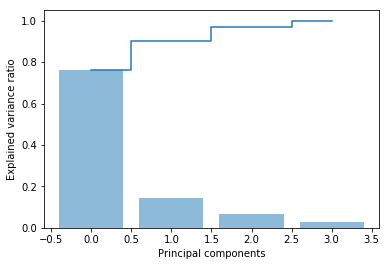

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_train1)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [23]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-0.13355647 -0.80930393  0.55497423  0.13854029]
 [-0.79452546  0.26930231  0.31270845 -0.44544246]
 [ 0.43064308  0.46671824  0.77051966  0.05495528]
 [ 0.40674132 -0.2338322  -0.02272633 -0.88281794]]
singular_ values
 [221.10643013  95.91242186  65.84760437  43.11795448]


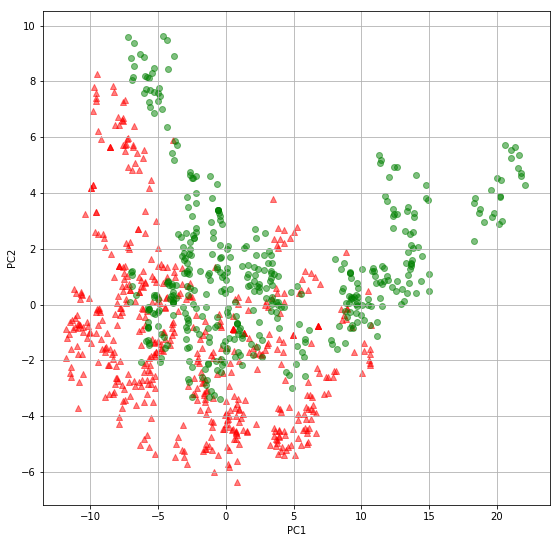

In [24]:
pca = PCA(n_components=2)
X_train_pca1 = pca.fit_transform(X_train1)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca1[y_train1 == 0, 0], X_train_pca1[y_train1 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca1[y_train1 == 1, 0], X_train_pca1[y_train1 == 1, 1],
              color='green', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()

X_train1_v1 = pd.DataFrame(data=X_train_pca1)

### KPCA - Banknotes dataset

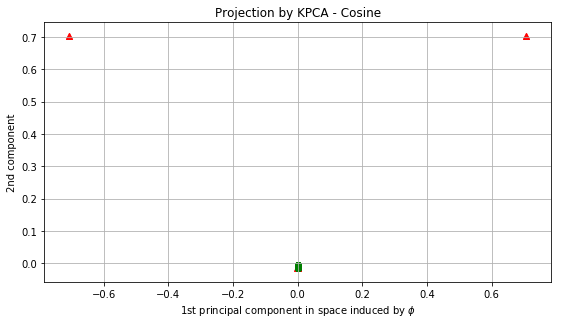

                0         1
0    1.382152e-07 -0.007558
1    9.259285e-08 -0.005048
2    8.817069e-08 -0.004805
3    8.911026e-08 -0.004856
4    8.644278e-08 -0.004710
5    8.675055e-08 -0.004727
6    9.199127e-08 -0.005036
7    8.850907e-08 -0.004823
8    8.636006e-08 -0.004705
9    9.634556e-08 -0.005256
10   1.949769e-07 -0.010704
11   1.226848e-07 -0.006703
12   8.939073e-08 -0.004872
13   9.085979e-08 -0.004952
14   1.060047e-07 -0.005784
15   8.840087e-08 -0.004817
16   8.618538e-08 -0.004696
17   1.294119e-07 -0.007073
18   8.621623e-08 -0.004697
19   9.332739e-08 -0.005089
20   8.620701e-08 -0.004697
21   1.906976e-07 -0.010473
22   8.832811e-08 -0.004813
23   9.739786e-08 -0.005311
24   8.618747e-08 -0.004696
25   2.569690e-07 -0.014161
26   9.725200e-08 -0.005303
27   1.179936e-07 -0.006444
28   8.925334e-08 -0.004864
29   9.958319e-08 -0.005431
..            ...       ...
930  1.036250e-07 -0.005653
931  8.637099e-08 -0.004706
932  1.292781e-07 -0.007067
933  9.380849e-08 -0

In [25]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca1 = kpca.fit_transform(X_train1)
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca1[y_train1 == 0, 0], X_train_kpca1[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca1[y_train1 == 1, 0], X_train_kpca1[y_train1 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.title("Projection by KPCA - Cosine")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()

X_train1_v2 = pd.DataFrame(data=X_train_kpca1)
print(X_train1_v2)

### PCA - Nursery dataset

Explained variance ratio: [0.26981109 0.16944106 0.16817992 0.09098258 0.09014584 0.08896548
 0.08879869 0.03367534]


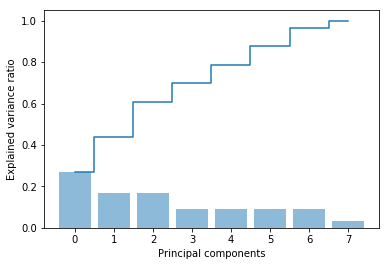

In [26]:
pca = PCA()
principalComponents = pca.fit_transform(X_train2)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [27]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-5.54976415e-03  9.99896583e-01  1.15023522e-02  1.40357075e-03
   3.12673680e-03  1.67515304e-03  3.21659191e-03 -4.33824777e-03]
 [ 3.17560603e-03 -4.82493568e-03  5.32746432e-01 -8.46023137e-01
  -1.76485827e-02 -1.82582010e-03 -5.81463945e-04  8.80812844e-03]
 [-3.52035688e-03 -1.03916851e-02  8.45691018e-01  5.33096146e-01
  -2.10641446e-02 -1.80133377e-03 -2.30719153e-03  6.52336564e-03]
 [ 2.01247652e-01  3.36657133e-03 -1.69758747e-02  1.70409812e-03
  -7.51065897e-01  3.85117041e-03 -4.71639691e-01 -4.15497476e-01]
 [ 8.24440937e-01  1.78693589e-03  5.19385087e-03  3.15569910e-03
   2.23317608e-02 -6.68895816e-05  5.17286331e-01 -2.28414434e-01]
 [ 2.53320890e-02  4.45462390e-03 -2.30032612e-02  5.49586014e-03
  -5.96871415e-01  6.43241410e-03  3.11661038e-01  7.38477910e-01]
 [-5.28299867e-01 -6.17604522e-03 -2.02273357e-03 -2.81412768e-03
  -2.79886804e-01 -2.03774394e-05  6.42512428e-01 -4.79260110e-01]
 [-8.84879949e-04 -1.74419091e-03  2.69054067e-03 -6.28

In [28]:
# Only two components for illustration
pca = PCA(n_components=7)
X_train_pca2 = pca.fit_transform(X_train2)

X_train2_v1 = pd.DataFrame(data=X_train_pca2)

### KPCA - Nursery dataset

In [29]:
#from sklearn.decomposition import KernelPCA

#kpca = KernelPCA(n_components = 7 ,kernel="rbf", fit_inverse_transform=True, gamma=10)
#X_train_kpca2 = kpca.fit_transform(X_train2)

'''
fig= plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",
            marker='x', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",
            marker='s', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",
            marker='*', alpha=0.5)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()
'''
#X_train2_v2 = pd.DataFrame(data=X_train_kpca2)

'\nfig= plt.figure(figsize=(20, 20))\n\nplt.subplot(2, 2, 1, aspect=\'equal\')\n\nplt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",\n            marker=\'^\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",\n            marker=\'o\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",\n            marker=\'x\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",\n            marker=\'s\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",\n            marker=\'*\', alpha=0.5)\nplt.title("Projection by KPCA")\nplt.xlabel("1st principal component in space induced by $\\phi$")\nplt.ylabel("2nd component")\nplt.grid()\nplt.show()\n'

## Task B - Predictive Model

In [30]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

### MLP - Banknotes dataset

In [31]:
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import accuracy_score

#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter = 500)
#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=500, alpha=0.0001,
 #   solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
#mlp.fit(X_train1, y_train1)

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
# Código que encontrei online
#y_pred = mlp.predict(X_test1)
#accuracy_score(y_test1, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


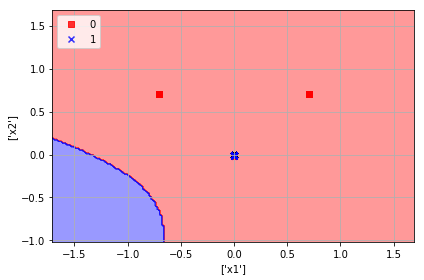

In [33]:
mlp.fit(X_train1_v2.values,y_train1.values)
plot_decision_regions(X_train1_v2.values, y_train1.values, classifier=mlp)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
print('Banknotes dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

Banknotes dataset
the weights are 
 [array([[ 0.34909636,  0.32407281,  0.04061172, -0.1228487 ,  0.48783348,
        -0.61083053,  0.59489382, -0.3171568 , -0.08476572,  0.64717005],
       [ 0.55511515,  0.29056743,  0.12690203, -0.49316378,  0.09471729,
         0.03550702, -0.07236114,  0.01302934,  0.33976781,  0.24241265]]), array([[ 0.50056788,  0.12148359, -0.41583926,  0.10947729,  0.14341116],
       [ 0.07126303, -0.6056387 , -0.24246185,  0.57650739,  0.43091804],
       [ 0.05769979, -0.64707668, -0.49454968,  0.4543095 ,  0.31302119],
       [-0.17266349,  0.59311847,  0.11323052, -0.0730745 , -0.44846858],
       [-0.08690535,  0.62883392,  0.20696381, -0.18635498,  0.5749743 ],
       [ 0.42825185,  0.25534259, -0.16788888,  0.15486185, -0.40217498],
       [ 0.24825371, -0.27524291,  0.11890525, -0.56368006, -0.00268121],
       [ 0.25769984,  0.10799717, -0.27167541,  0.10963313,  0.28725777],
       [-0.01310391, -0.32717258, -0.29881323,  0.48249469,  0.17543109],
 

### MLP - Nursery dataset

In [35]:
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [36]:
mlp.fit(X_train2_v1.values,y_train2.values)
plot_decision_regions(X_train2_v1.values, y_train2.values, classifier=mlp)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

ValueError: shapes (94544,2) and (7,10) not aligned: 2 (dim 1) != 7 (dim 0)

In [ ]:
print('Nursery dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

### SVM - Banknotes dataset

In [ ]:
from sklearn.svm import SVC

svm=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)
svm

In [ ]:
svm=svm.fit(X_train1.values, y_train1.values)

print(type(X_train1))
print(X_train1_v2.values)

plot_decision_regions(X_train1[0:2].values, y_train1.values, classifier=svm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
print('Banknotes dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

### SVM - Nursery dataset

In [ ]:
svm=SVC(C=1.0,kernel='rbf', max_iter=4000, tol=1e-05, verbose=0)
svm

In [ ]:
svm=svm.fit(X_train2.values, y_train2.values)
#plot_decision_regions(X_train2.values, y_train2.values, classifier=svm)
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.legend(loc='upper left')
#plt.grid()
#plt.tight_layout()
#plt.show()

In [ ]:
print('Nursery dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)